
# Temperature Forecast

Project Description:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

Attribute Information:
For more information, read [Cho et al, 2020].

1. station - used weather station number: 1 to 25

2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')

3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6

4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9

5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5

6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100

7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5

8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6

9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9

10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4

11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97

12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97

13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98

14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97

15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7

16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6

17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8

18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7

19. lat - Latitude (Â°): 37.456 to 37.645

20. lon - Longitude (Â°): 126.826 to 127.135

21. DEM - Elevation (m): 12.4 to 212.3

22. Slope - Slope (Â°): 0.1 to 5.2

23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9

24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9

25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.

Dataset Link-

https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv


In [ ]:
# IMPORT LIBRARIES

import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy import stats as sp

In [ ]:
# read & store the data in DF

df_raw = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')
df_raw.sample(3)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
1932,8.0,15-07-2014,30.3,23.9,54.432327,88.675430,28.422680,22.180771,7.285930,35.466142,...,0.0,0.0,0.0,37.4697,126.910,52.518,1.5629,5719.192871,31.7,22.4
6863,14.0,26-07-2017,32.4,24.8,47.460960,74.888107,30.924408,25.119910,5.795191,18.530682,...,0.0,0.0,0.0,37.4967,126.927,30.968,0.6180,5524.800781,29.6,24.9
1281,7.0,20-08-2013,32.4,24.0,49.288723,82.604401,32.612447,25.024369,5.231305,136.937330,...,0.0,0.0,0.0,37.5776,126.838,12.370,0.0985,4815.746094,33.5,25.4


In [ ]:
df_raw.shape

(7752, 25)

Rows: 7752

Columns: 25

In [ ]:
# Finding the number of unique values in a column, datatype & Non-Null count

for index in df_raw.columns.to_list():
  print(index,':', df_raw[index].nunique(), ', type:',df_raw[index].dtype, ', Null Count:',df_raw[index].isnull().sum())

station : 25 , type: float64 , Null Count: 2
Date : 310 , type: object , Null Count: 2
Present_Tmax : 167 , type: float64 , Null Count: 70
Present_Tmin : 155 , type: float64 , Null Count: 70
LDAPS_RHmin : 7672 , type: float64 , Null Count: 75
LDAPS_RHmax : 7664 , type: float64 , Null Count: 75
LDAPS_Tmax_lapse : 7675 , type: float64 , Null Count: 75
LDAPS_Tmin_lapse : 7675 , type: float64 , Null Count: 75
LDAPS_WS : 7675 , type: float64 , Null Count: 75
LDAPS_LH : 7675 , type: float64 , Null Count: 75
LDAPS_CC1 : 7569 , type: float64 , Null Count: 75
LDAPS_CC2 : 7582 , type: float64 , Null Count: 75
LDAPS_CC3 : 7599 , type: float64 , Null Count: 75
LDAPS_CC4 : 7524 , type: float64 , Null Count: 75
LDAPS_PPT1 : 2812 , type: float64 , Null Count: 75
LDAPS_PPT2 : 2510 , type: float64 , Null Count: 75
LDAPS_PPT3 : 2356 , type: float64 , Null Count: 75
LDAPS_PPT4 : 1918 , type: float64 , Null Count: 75
lat : 12 , type: float64 , Null Count: 0
lon : 25 , type: float64 , Null Count: 0
DEM : 2

All labels dtypes are float, except date which is object dtype








**Only 2 null entries in date & station: Dropping the null values in Date & Station**

In [ ]:
df_raw.dropna(inplace=True)
print(df_raw.shape)
df_raw.info()

(7588, 25)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Date              7588 non-null   object 
 2   Present_Tmax      7588 non-null   float64
 3   Present_Tmin      7588 non-null   float64
 4   LDAPS_RHmin       7588 non-null   float64
 5   LDAPS_RHmax       7588 non-null   float64
 6   LDAPS_Tmax_lapse  7588 non-null   float64
 7   LDAPS_Tmin_lapse  7588 non-null   float64
 8   LDAPS_WS          7588 non-null   float64
 9   LDAPS_LH          7588 non-null   float64
 10  LDAPS_CC1         7588 non-null   float64
 11  LDAPS_CC2         7588 non-null   float64
 12  LDAPS_CC3         7588 non-null   float64
 13  LDAPS_CC4         7588 non-null   float64
 14  LDAPS_PPT1        7588 non-null   float64
 15  LDAPS_PPT2        7588 non-null   float64
 16  LDAPS_PPT3        7588 non-null

**Null values have been dropped from all labels**

In [ ]:
# Finding the number of unique values in a column

for index in df_raw.columns.to_list():
  print(index,':', df_raw[index].nunique())

station : 25
Date : 307
Present_Tmax : 167
Present_Tmin : 155
LDAPS_RHmin : 7585
LDAPS_RHmax : 7577
LDAPS_Tmax_lapse : 7588
LDAPS_Tmin_lapse : 7588
LDAPS_WS : 7588
LDAPS_LH : 7588
LDAPS_CC1 : 7485
LDAPS_CC2 : 7496
LDAPS_CC3 : 7512
LDAPS_CC4 : 7438
LDAPS_PPT1 : 2779
LDAPS_PPT2 : 2479
LDAPS_PPT3 : 2326
LDAPS_PPT4 : 1892
lat : 12
lon : 25
DEM : 25
Slope : 25
Solar radiation : 1575
Next_Tmax : 181
Next_Tmin : 157


<Axes: >

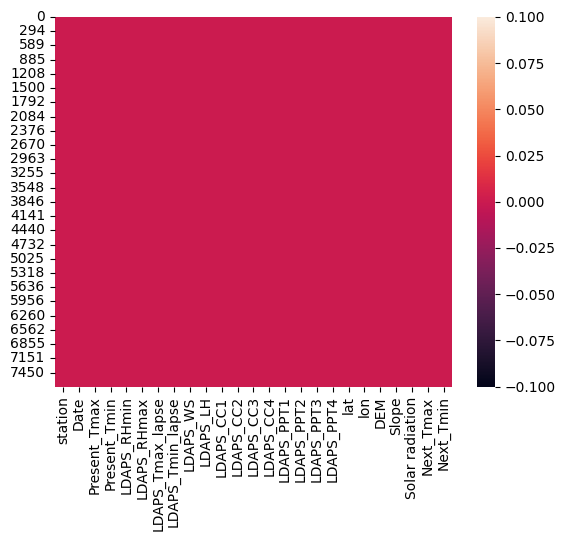

In [ ]:
# Visualize Null values using Heatmap

sns.heatmap(df_raw.isnull())

Station, Date, lat, long, DEM, Slope are categorical data, label encoder can be used to eliminate null values in these cases

LDAPS, Solar Radiations are continous Numerical

# Applying Label Encoder on Categorical columns

In [ ]:
# Applying Label Encoder on categorical data (Object)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_raw['station'] = le.fit_transform(df_raw['station'])
df_raw['Date'] = le.fit_transform(df_raw['Date'])
df_raw['lat'] = le.fit_transform(df_raw['lat'])
df_raw['lon'] = le.fit_transform(df_raw['lon'])
df_raw['DEM'] = le.fit_transform(df_raw['DEM'])
df_raw['Slope'] = le.fit_transform(df_raw['Slope'])


In [ ]:
df_raw.sample(3)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
5781,6,137,33.2,28.1,55.902813,94.720161,32.340396,25.591708,4.945611,124.013576,...,0.0,0.0,0.0,8,1,0,0,4984.893066,34.6,26.0
147,22,40,30.6,22.2,61.642429,95.300514,29.991660,21.889951,5.788171,76.099314,...,0.0,0.0,0.0,6,2,1,3,5818.678711,31.3,21.0
2023,23,170,30.2,22.4,52.827129,89.901268,31.212153,24.280785,6.535758,39.681018,...,0.0,0.0,0.0,5,3,2,4,5662.612793,30.4,24.8


**Check Statistical Summary**

In [ ]:
df_raw.describe()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,12.014101,152.971402,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,...,0.480738,0.275007,0.265373,5.962572,12.001186,12.006326,12.014233,5343.724208,30.241526,22.910820
std,7.217858,88.582041,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,...,1.743327,1.146087,1.179661,3.004662,7.199276,7.214462,7.213629,429.782561,3.111807,2.482256
min,0.000000,0.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4329.520508,17.400000,11.300000
25%,6.000000,76.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,...,0.000000,0.000000,0.000000,4.000000,6.000000,6.000000,6.000000,5001.485717,28.200000,21.300000
50%,12.000000,153.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,...,0.000000,0.000000,0.000000,7.000000,12.000000,12.000000,12.000000,5441.987305,30.400000,23.100000
75%,18.000000,230.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,...,0.017735,0.007855,0.000017,8.000000,18.000000,18.000000,18.000000,5729.485840,32.600000,24.600000
max,24.000000,306.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,11.000000,24.000000,24.000000,24.000000,5992.895996,38.900000,29.800000


**Std Deviation is high for almost all labels**

Applying Scalar on continous numeric labels where std dev is higher

In [ ]:
from sklearn.preprocessing import RobustScaler

# Create a RobustScaler object
scaler = RobustScaler()

# Columns to Scale
columns_to_scale = ['LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_LH', 'Solar radiation']

# Create a DataFrame containing with selected columns
df_tmp_feat = df_raw[columns_to_scale]

# Scaleing
df_tmp_sca = pd.DataFrame(scaler.fit_transform(df_tmp_feat), columns=columns_to_scale)

# Reset the index of df_raw
df_raw.reset_index(drop=True, inplace=True)

# Replace scaled columns
df_raw[columns_to_scale] = df_tmp_sca

# Print information about the scaled DataFrame and check for NaN values and standard deviations
print(df_raw.shape)
print(df_raw.isnull().sum())
print(df_raw.std())

(7588, 25)
station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64
station              7.217858
Date                88.582041
Present_Tmax         2.967401
Present_Tmin         2.400880
LDAPS_RHmin          0.691404
LDAPS_RHmax          0.754739
LDAPS_Tmax_lapse     2.943496
LDAPS_Tmin_lapse     2.342579
LDAPS_WS             2.177034
LDAPS_LH             0.716278
LDAPS_CC1            0.262260
LDAPS_CC2            0.257922
LDAPS_CC3            0.249833
LDAPS_CC4            0.253392
LDAPS_

*Std Dev is now in acceptable range*

# GRAPHICAL ANALYSIS

*UNIVARIATE*

*Visualize Outliers with Box-plot*

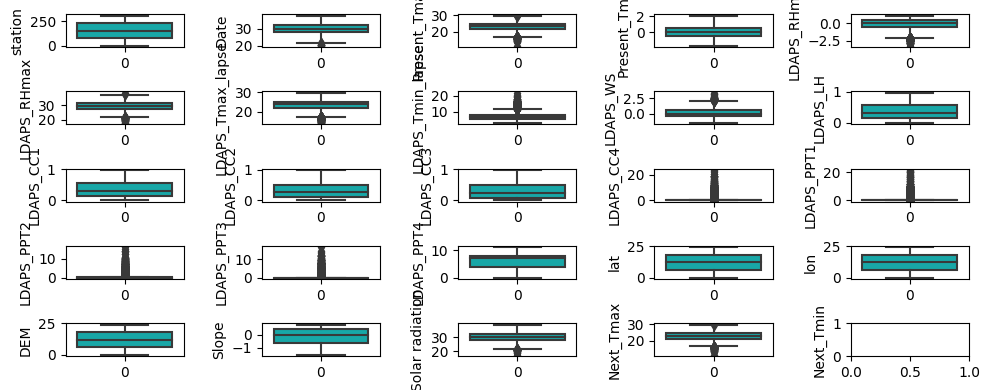

In [ ]:
# Box plot Analysis

mp.figure(figsize=(10,4))
pnum = 1

for index in df_raw.columns.to_list():
  if(pnum<=25):
    sns.boxplot(df_raw[index], color = 'c')
    ax = mp.subplot(5,5,pnum)
    mp.ylabel(index)
  pnum = pnum+1
  mp.tight_layout()

mp.show()

*outliers as visible in Boxplot*

In [ ]:
# Removing Outliers where |Z-score| > 3
# With Next_Tmax & Next_Tmin as target

df_tmp_tg1 = df_raw['Next_Tmax']
df_tmp_tg2 = df_raw['Next_Tmin']
df_tmp_ft = df_raw.drop(['Next_Tmax','Next_Tmin'], axis =1, inplace = False)

df_tmp_fil = df_raw[(np.abs(sp.zscore(df_tmp_ft) <= 3)).all(axis=1)]

print(df_tmp_ft.shape)
print(df_tmp_fil.shape)

df_tmp_fil.sample(3)

(7588, 23)
(6861, 25)


,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
3392,11,121,22.8,20.1,-0.367469,0.498406,30.316027,21.625949,8.110745,-0.440863,...,0.0,0.0,0.0,7,10,21,11,0.502016,31.3,20.5
3622,16,210,30.2,23.4,0.045491,0.544651,30.407816,25.357057,4.785014,1.200318,...,0.0,0.0,0.0,10,23,15,14,0.240086,31.3,23.0
3408,2,131,30.7,22.4,-1.336668,-1.036904,35.847172,24.137321,7.526521,-0.804283,...,0.0,0.0,0.0,8,19,9,5,0.402796,34.2,22.3


# BIVARIATE ANALYSIS

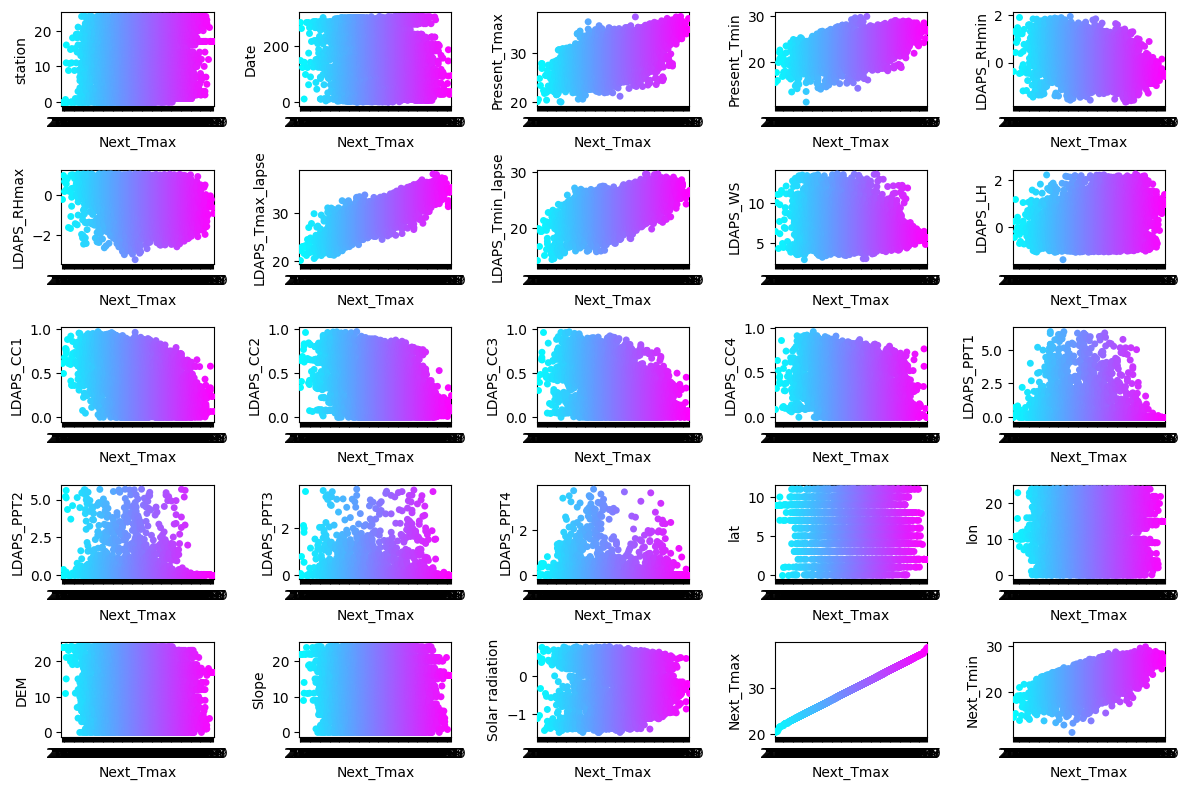

In [ ]:
# Stripplpt wrt Next_Tmax

mp.figure(figsize=(12,8))
pnum = 1

for index in df_tmp_fil.columns.to_list():
  if(pnum<=25):
    ax = mp.subplot(5,5, pnum)
    sns.stripplot(x=df_tmp_fil['Next_Tmax'], y =df_tmp_fil[index], palette = 'cool')
    mp.ylabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

*Next_Tmax has +ve slopes with Present_Tmax, Present_Tmin, Next_Tmin*

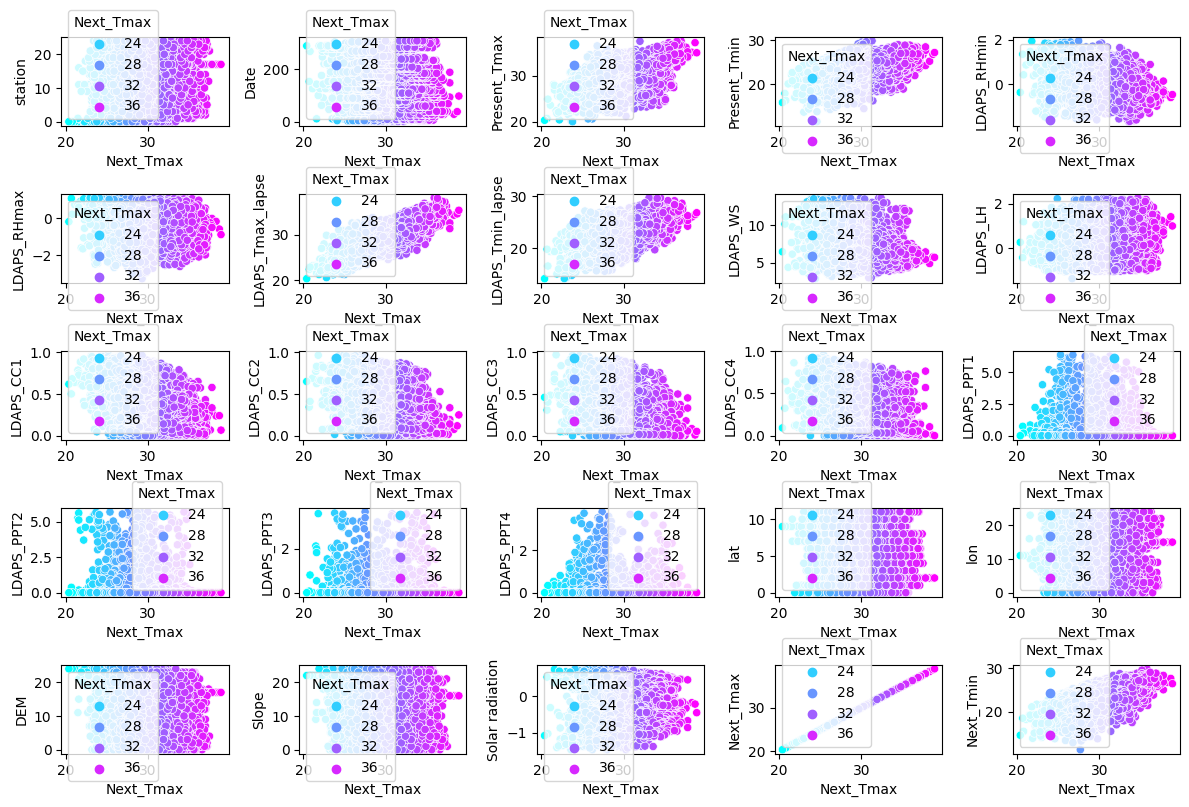

In [ ]:
# Scatterplot wrt Next_Tmax

mp.figure(figsize=(12,8))
pnum = 1

for index in df_tmp_fil.columns.to_list():
  if(pnum<=25):
    ax = mp.subplot(5,5, pnum)
    sns.scatterplot(x=df_tmp_fil['Next_Tmax'], y =df_tmp_fil[index], palette = 'cool', hue = df_tmp_fil['Next_Tmax'])
    mp.ylabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

**Similar observation verified in scatterplot**

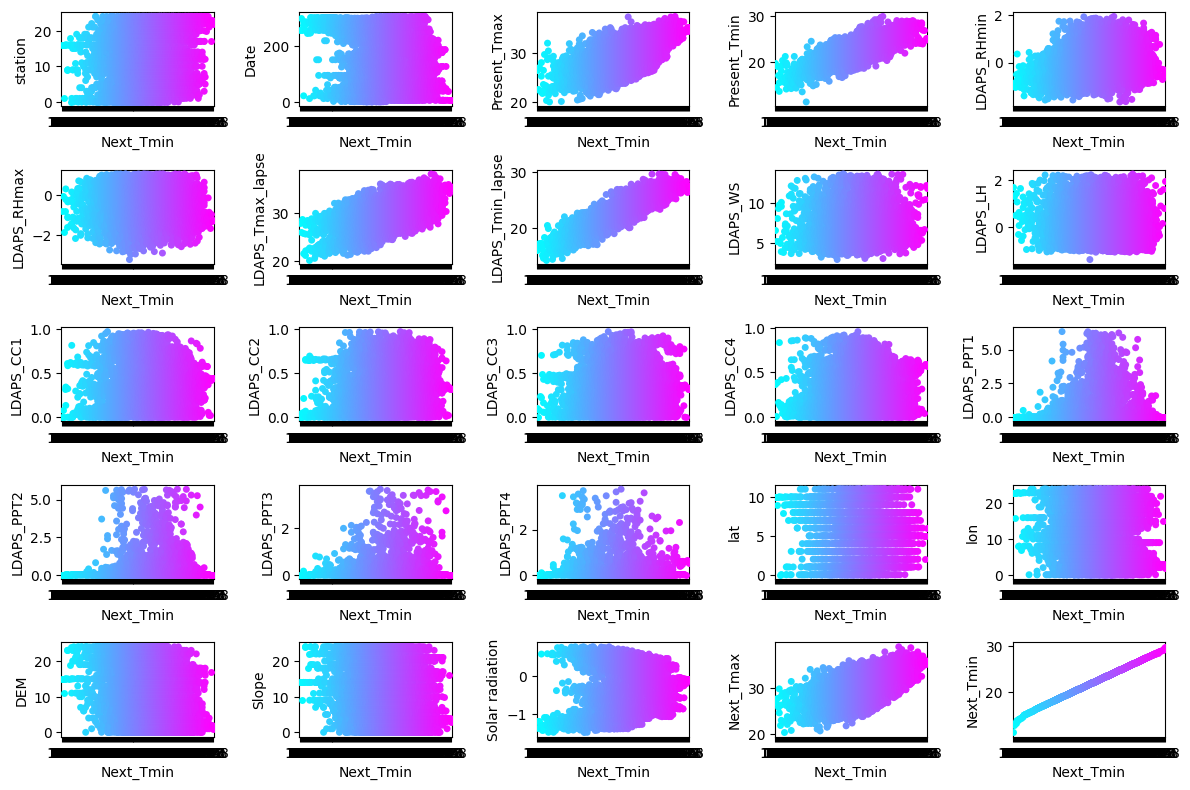

In [ ]:
# Stripplpt wrt Next_Tmin

mp.figure(figsize=(12,8))
pnum = 1

for index in df_tmp_fil.columns.to_list():
  if(pnum<=25):
    ax = mp.subplot(5,5, pnum)
    sns.stripplot(x=df_tmp_fil['Next_Tmin'], y =df_tmp_fil[index], palette = 'cool')
    mp.ylabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

*Similar Observation for Present_Tmin*

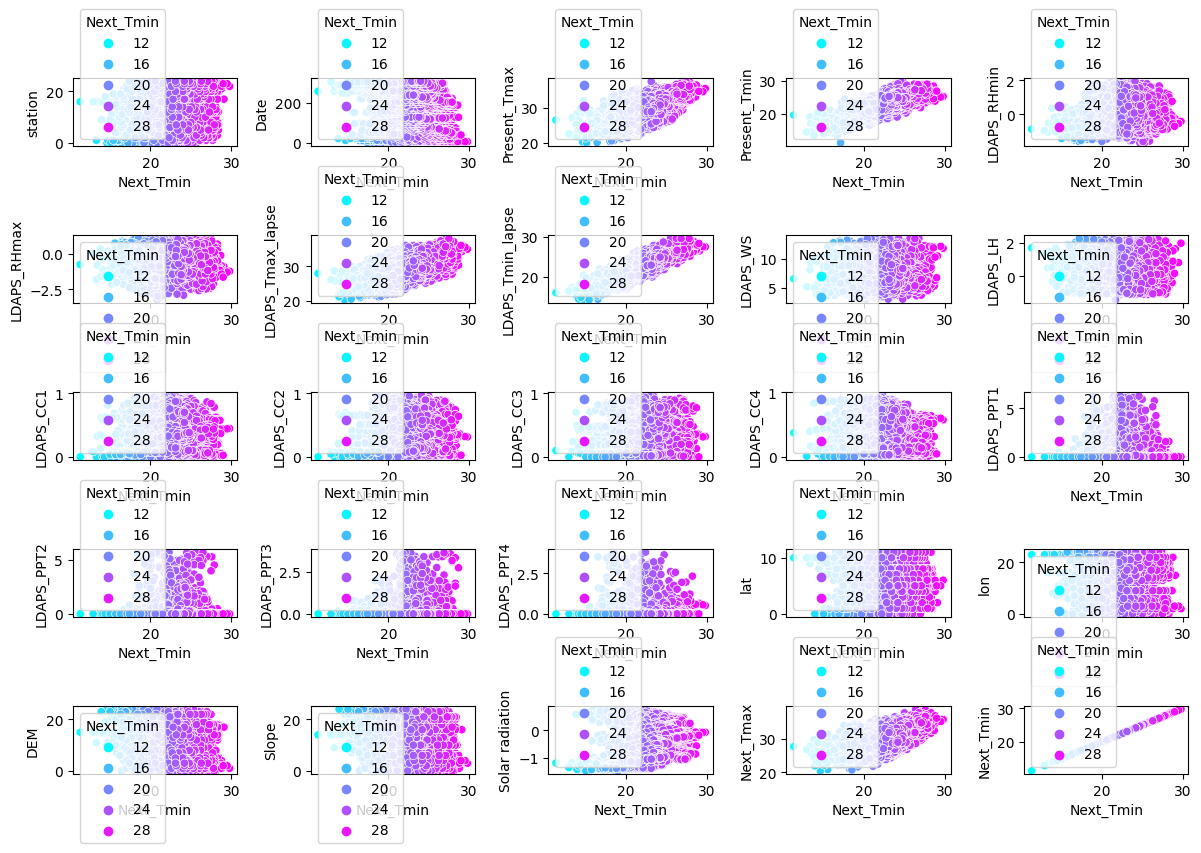

In [ ]:
# Scatterplot wrt Next_Tmin

mp.figure(figsize=(12,8))
pnum = 1

for index in df_tmp_fil.columns.to_list():
  if(pnum<=25):
    ax = mp.subplot(5,5, pnum)
    sns.scatterplot(x=df_tmp_fil['Next_Tmin'], y =df_tmp_fil[index], palette = 'cool', hue = df_tmp_fil['Next_Tmin'])
    mp.ylabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

*scatterplot shows similar observation as strippllot*

# MULTIVARIATE ANALYSIS

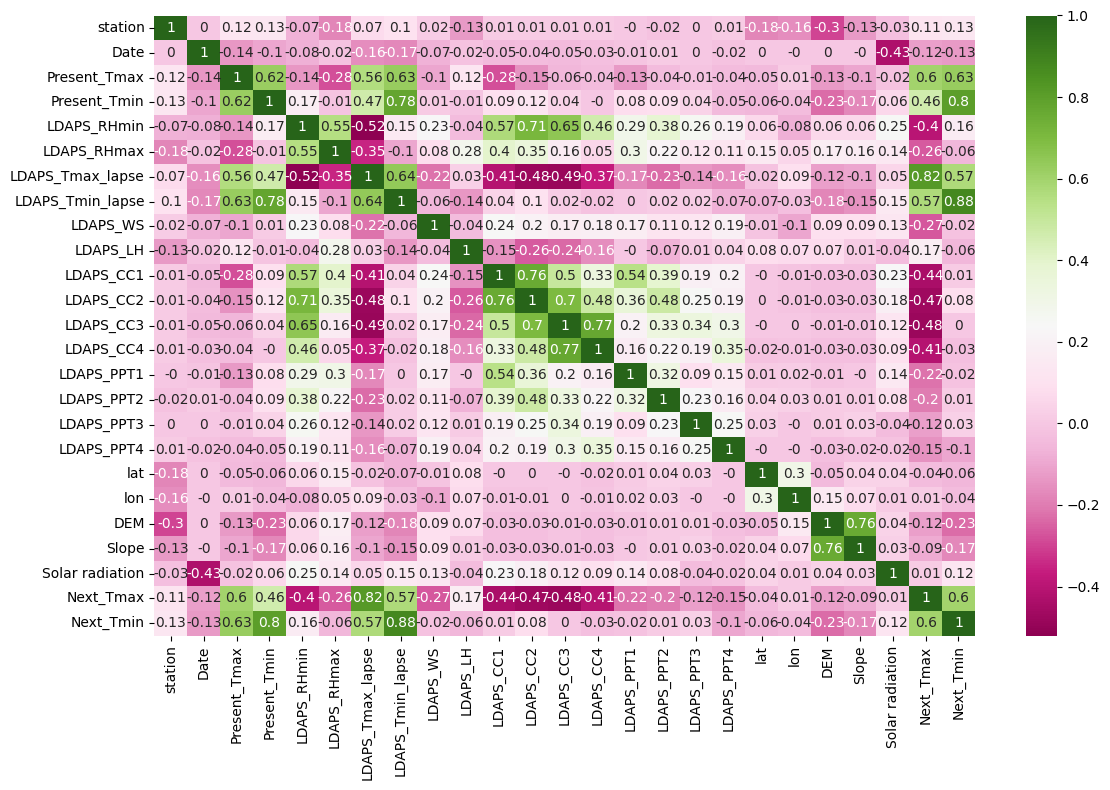

In [ ]:
mp.figure(figsize=(12,8))
sns.heatmap(round(df_tmp_fil.corr(),2), cmap = 'PiYG', annot = True)
mp.tight_layout()
mp.show()

1. Strong +ve correlation between Next_Tmax & LDAPS_Tmax_lapse

2. Strong +ve correlation between Next_Tmin & LDAPS_Tmin_lapse, Present T_Min

**Std deviation & Skewness**

In [ ]:
df_tmp_fil.skew()

station            -0.006799
Date                0.001524
Present_Tmax       -0.309988
Present_Tmin       -0.366021
LDAPS_RHmin         0.318933
LDAPS_RHmax        -0.771429
LDAPS_Tmax_lapse   -0.162059
LDAPS_Tmin_lapse   -0.536960
LDAPS_WS            1.085907
LDAPS_LH            0.566386
LDAPS_CC1           0.592328
LDAPS_CC2           0.507326
LDAPS_CC3           0.694163
LDAPS_CC4           0.713823
LDAPS_PPT1          3.759562
LDAPS_PPT2          4.892305
LDAPS_PPT3          5.560988
LDAPS_PPT4          5.951052
lat                -0.335262
lon                 0.010399
DEM                 0.005153
Slope               0.004527
Solar radiation    -0.517163
Next_Tmax          -0.287295
Next_Tmin          -0.405900
dtype: float64

**For all continous numeric label where abs(skewness)  > 1, apply cbrt transformation**


In [ ]:
# Applying CBRT to treat skewness

df_tmp_fil['LDAPS_WS'] = np.cbrt(df_tmp_fil['LDAPS_WS'])
df_tmp_fil['LDAPS_PPT1'] = np.cbrt(df_tmp_fil['LDAPS_PPT1'])
df_tmp_fil['LDAPS_PPT2'] = np.cbrt(df_tmp_fil['LDAPS_PPT2'])
df_tmp_fil['LDAPS_PPT3'] = np.cbrt(df_tmp_fil['LDAPS_PPT3'])
df_tmp_fil['LDAPS_PPT4'] = np.cbrt(df_tmp_fil['LDAPS_PPT4'])

df_tmp_fil.skew()

station            -0.006799
Date                0.001524
Present_Tmax       -0.309988
Present_Tmin       -0.366021
LDAPS_RHmin         0.318933
LDAPS_RHmax        -0.771429
LDAPS_Tmax_lapse   -0.162059
LDAPS_Tmin_lapse   -0.536960
LDAPS_WS            0.618574
LDAPS_LH            0.566386
LDAPS_CC1           0.592328
LDAPS_CC2           0.507326
LDAPS_CC3           0.694163
LDAPS_CC4           0.713823
LDAPS_PPT1          1.942935
LDAPS_PPT2          2.369418
LDAPS_PPT3          2.518571
LDAPS_PPT4          2.846364
lat                -0.335262
lon                 0.010399
DEM                 0.005153
Slope               0.004527
Solar radiation    -0.517163
Next_Tmax          -0.287295
Next_Tmin          -0.405900
dtype: float64

**Few labels are still having high skewness**

**Check Multicollinearity (VIF)**

In [ ]:
# Checking VIF case for Next_Tmax

# Separating Target label Avg Price
df_tmp_vf = df_tmp_fil.drop(['Next_Tmax','Next_Tmin'], axis =1, inplace = False)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = df_tmp_vf.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_tmp_vf.values,i) for i in range(len(df_tmp_vf.columns))]

vif

,Feature,VIF Val
0,station,4.664963
1,Date,4.897820
2,Present_Tmax,282.773695
3,Present_Tmin,301.705667
4,LDAPS_RHmin,5.763583
5,LDAPS_RHmax,2.324195
6,LDAPS_Tmax_lapse,611.085695
7,LDAPS_Tmin_lapse,715.997678
8,LDAPS_WS,95.322105
9,LDAPS_LH,1.595443


In [ ]:
# Remove Collinearity by dropping High VIF label , ie, LDAPS_Tmin_lapse

df_tmp_vf.drop('LDAPS_Tmin_lapse', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_tmp_vf.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_tmp_vf.values,i) for i in range(len(df_tmp_vf.columns))]

vif

,Feature,VIF Val
0,station,4.663863
1,Date,4.897617
2,Present_Tmax,262.997685
3,Present_Tmin,264.662623
4,LDAPS_RHmin,4.057256
5,LDAPS_RHmax,2.287732
6,LDAPS_Tmax_lapse,287.553479
7,LDAPS_WS,92.980764
8,LDAPS_LH,1.494703
9,LDAPS_CC1,13.368304


In [ ]:
# Remove Collinearity by dropping High VIF label , ie, LDAPS_Tmax_lapse

df_tmp_vf.drop('LDAPS_Tmax_lapse', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_tmp_vf.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_tmp_vf.values,i) for i in range(len(df_tmp_vf.columns))]

vif

,Feature,VIF Val
0,station,4.663714
1,Date,4.897355
2,Present_Tmax,221.529217
3,Present_Tmin,203.274913
4,LDAPS_RHmin,3.447058
5,LDAPS_RHmax,2.270037
6,LDAPS_WS,86.117056
7,LDAPS_LH,1.460049
8,LDAPS_CC1,13.306850
9,LDAPS_CC2,15.062925


In [ ]:
# Remove Collinearity by dropping High VIF label , ie, Present_Tmax

df_tmp_vf.drop('Present_Tmax', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_tmp_vf.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_tmp_vf.values,i) for i in range(len(df_tmp_vf.columns))]

vif

,Feature,VIF Val
0,station,4.638213
1,Date,4.881379
2,Present_Tmin,64.881087
3,LDAPS_RHmin,3.279840
4,LDAPS_RHmax,2.207301
5,LDAPS_WS,80.075607
6,LDAPS_LH,1.370027
7,LDAPS_CC1,12.391947
8,LDAPS_CC2,14.914400
9,LDAPS_CC3,12.451355


In [ ]:
# Remove Collinearity by dropping High VIF label , ie, LDAPS_WS

df_tmp_vf.drop('LDAPS_WS', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_tmp_vf.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_tmp_vf.values,i) for i in range(len(df_tmp_vf.columns))]

vif

,Feature,VIF Val
0,station,4.551097
1,Date,4.779567
2,Present_Tmin,20.064569
3,LDAPS_RHmin,3.217853
4,LDAPS_RHmax,2.203547
5,LDAPS_LH,1.367857
6,LDAPS_CC1,12.261472
7,LDAPS_CC2,14.884776
8,LDAPS_CC3,12.448698
9,LDAPS_CC4,7.035240


In [ ]:
# Remove Collinearity by dropping High VIF label , ie, Present_Tmin

df_tmp_vf.drop('Present_Tmin', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_tmp_vf.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_tmp_vf.values,i) for i in range(len(df_tmp_vf.columns))]

vif

,Feature,VIF Val
0,station,3.478919
1,Date,4.456600
2,LDAPS_RHmin,3.177053
3,LDAPS_RHmax,2.131279
4,LDAPS_LH,1.297798
5,LDAPS_CC1,11.993286
6,LDAPS_CC2,14.463986
7,LDAPS_CC3,12.430334
8,LDAPS_CC4,7.008537
9,LDAPS_PPT1,3.294176


In [ ]:
# Remove Collinearity by dropping High VIF label , ie, LDAPS_CC2

df_tmp_vf.drop('LDAPS_CC2', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_tmp_vf.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_tmp_vf.values,i) for i in range(len(df_tmp_vf.columns))]

vif

,Feature,VIF Val
0,station,3.431092
1,Date,4.438394
2,LDAPS_RHmin,3.011622
3,LDAPS_RHmax,2.130669
4,LDAPS_LH,1.262443
5,LDAPS_CC1,7.904011
6,LDAPS_CC3,11.351173
7,LDAPS_CC4,7.006230
8,LDAPS_PPT1,3.070502
9,LDAPS_PPT2,2.192730


In [ ]:
# Remove Collinearity by dropping High VIF label , ie, LDAPS_CC3

df_tmp_vf.drop('LDAPS_CC3', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_tmp_vf.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_tmp_vf.values,i) for i in range(len(df_tmp_vf.columns))]

vif

,Feature,VIF Val
0,station,3.406081
1,Date,4.437300
2,LDAPS_RHmin,2.591054
3,LDAPS_RHmax,2.072828
4,LDAPS_LH,1.233456
5,LDAPS_CC1,7.345117
6,LDAPS_CC4,4.103226
7,LDAPS_PPT1,3.001641
8,LDAPS_PPT2,2.186183
9,LDAPS_PPT3,1.827410


**Multicollinearity has been treated**

# MODELLING

In [ ]:
# Separate independent & target labels

x_dfr = df_tmp_vf
y1_dfr = df_tmp_fil['Next_Tmax']
y2_dfr = df_tmp_fil['Next_Tmin']

# Import Libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

print(x_dfr.shape)
print(y1_dfr.shape)
print(y2_dfr.shape)

(6861, 16)
(6861,)
(6861,)


In [ ]:
# Import Libraries

from sklearn.linear_model import Lasso, Ridge, LinearRegression, ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [ ]:
# Hypertuning various models for Next_Tmax

ls = Lasso()
rd = Ridge()
en = ElasticNet()

mdl = [ls, rd, en]

param = {"alpha": [0.001, 0.01, 0.1,1,10], "random_state": range(1,100)}

samples = 8
bs_prm = []

for mod in mdl:
  randomCV = RandomizedSearchCV(mod, param_distributions=param, n_iter=samples,cv=5)
  randomCV.fit(x_dfr, y1_dfr)
  print(mod, randomCV.best_params_)
  bs_prm.append(randomCV.best_params_)

Lasso() {'random_state': 58, 'alpha': 0.01}
Ridge() {'random_state': 94, 'alpha': 10}
ElasticNet() {'random_state': 8, 'alpha': 0.01}


*Checking Metrics*

In [ ]:
from sklearn.metrics import  mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

min_mse = 999999999999999999999999
bs_prm

[{'random_state': 58, 'alpha': 0.01},
 {'random_state': 94, 'alpha': 10},
 {'random_state': 8, 'alpha': 0.01}]

*Checking Metrics of Lasso*



In [ ]:
# Chekcing Metrics of Lasso

bsp = bs_prm[0]
LS = Lasso(random_state = bsp['random_state'], alpha = bsp['alpha'])

bst_rs_ls = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_dfr, y1_dfr, random_state = i, test_size = 0.2)
  LS.fit(x_train, y_train)
  predict = LS.predict(x_test)
  msq_err = mean_squared_error(y_test, predict)
  r2_sc = r2_score(y_test, predict)

  if(msq_err <= min_mse):
    min_mse = msq_err
    bst_rs_ls = i

print("Least MSE at random state = ", bst_rs_ls, 'mse:',min_mse, "r2_scr:", r2_sc)

Least MSE at random state =  2 mse: 5.22914303170496 r2_scr: 0.3515276569985264


*Checking Metrics of Ridge*


In [ ]:
# Applying Ridge with hypertuned parameters

bsp = bs_prm[1]
RG = Ridge(random_state = bsp['random_state'], alpha = bsp['alpha'])

bst_rs_rd = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_dfr, y1_dfr, random_state = i, test_size = 0.2)
  RG.fit(x_train, y_train)
  predict = RG.predict(x_test)
  msq_err = mean_squared_error(y_test, predict)
  r2_sc = r2_score(y_test, predict)

  if(msq_err <= min_mse):
    min_mse = msq_err
    bst_rs = i

print("Least MSE at random state = ", bst_rs_rd, 'mse:',min_mse, "r2_scr:", r2_sc)

Least MSE at random state =  0 mse: 5.22914303170496 r2_scr: 0.35114453273172885


*Checking Metrics of ElasticNet*

In [ ]:
# Applying ElasticNet with hypertuned parameters

bsp = bs_prm[2]
EN = ElasticNet(random_state = bsp['random_state'], alpha = bsp['alpha'])

bst_rs_en = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_dfr, y1_dfr, random_state = i, test_size = 0.2)
  EN.fit(x_train, y_train)
  predict = EN.predict(x_test)
  msq_err = mean_squared_error(y_test, predict)
  r2_sc = r2_score(y_test, predict)

  if(msq_err <= min_mse):
    min_mse = msq_err
    bst_rs = i

print("Least MSE at random state = ", bst_rs_en, 'mse:',min_mse, "r2_scr:", r2_sc)

Least MSE at random state =  0 mse: 5.22914303170496 r2_scr: 0.3514750562053125


*Checking Metrics of RandomForestRegressor*

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

param = {"criterion": ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'], "random_state": range(1,100), 'max_features' :['sqrt','log2','None']}

randomCV = RandomizedSearchCV(rfr, param_distributions=param, n_iter=samples,cv=5)
randomCV.fit(x_dfr, y1_dfr)
print(rfr, randomCV.best_params_)
bs_prm = (randomCV.best_params_)

RandomForestRegressor() {'random_state': 84, 'max_features': 'sqrt', 'criterion': 'poisson'}


In [ ]:
# Applying RFR with hypertuned parameters

RFR = RandomForestRegressor(random_state = bs_prm['random_state'], max_features = bs_prm['max_features'], criterion = bs_prm['criterion'])

bst_rs = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_dfr, y1_dfr, random_state = i, test_size = 0.2)
  RFR.fit(x_train, y_train)
  predict = RFR.predict(x_test)
  msq_err = mean_squared_error(y_test, predict)
  r2_sc = r2_score(y_test, predict)

  if(msq_err <= min_mse):
    min_mse = msq_err
    bst_rs = i

print("Least MSE at random state = ", bst_rs, 'mse:',min_mse, "r2_scr:", r2_sc)

Least MSE at random state =  2 mse: 1.1795702308812819 r2_scr: 0.8428886044079598


*Checking Metrics of XGBoostRegressor*

In [ ]:
import xgboost as xg
import warnings
warnings.filterwarnings('ignore')

param = {"booster":["gblinear","squarederror"], "objective":["reg:linear", "reg:squarederror"],"verbosity": [0] }

xgr = xg.XGBRegressor()

randomCV = RandomizedSearchCV(xgr, param_distributions=param, n_iter=samples,cv=5)
randomCV.fit(x_dfr, y1_dfr)
bs_prm = (randomCV.best_params_)

bs_prm

{'verbosity': 0, 'objective': 'reg:linear', 'booster': 'gblinear'}

In [ ]:
# Applying XGBoost with hypertuned parameters


XGR = xg.XGBRegressor(objective = bs_prm['objective'], booster = bs_prm['booster'],verbosity = 0)

bst_rs = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_dfr, y1_dfr, random_state = i, test_size = 0.2)
  XGR.fit(x_train, y_train)
  predict = XGR.predict(x_test)
  msq_err = mean_squared_error(y_test, predict)
  r2_sc = r2_score(y_test, predict)

  if(msq_err <= min_mse):
    min_mse = msq_err
    bst_rs = i

print("Least MSE at random state = ", bst_rs, 'mse:',min_mse, "r2_scr:", r2_sc)

Least MSE at random state =  0 mse: 1.1795702308812819 r2_scr: 0.335314080968821


**For Next_Tmax: RandomForestRegressor Model gives leasr MSE & Best r2_scr**



In [ ]:
from sklearn.model_selection import cross_val_score

cv = 5

model_list = [LS, RG, EN, RFR, XGR]
cv_score_list = []

for mdl in model_list:
  cvs = cross_val_score(mdl, x_dfr,y1_dfr)
  print(mdl, '\n' ': Avg CV Score is ', cvs.mean(),'\n' )
  cv_score_list.append(cvs.mean())

Lasso(alpha=0.01, random_state=58) 
: Avg CV Score is  0.19720891375875563 

Ridge(alpha=10, random_state=94) 
: Avg CV Score is  0.18936671573189726 

ElasticNet(alpha=0.01, random_state=8) 
: Avg CV Score is  0.19251091090838807 

RandomForestRegressor(criterion='poisson', max_features='sqrt', random_state=84) 
: Avg CV Score is  0.40220772983971365 

XGBRegressor(base_score=None, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_est

**On basis of Avg CV Score and r2 score: Random Forest Regressor is selected**

# MODELLING Next T_Min

In [ ]:
# Hypertuning various models for Next_Tmin

ls2 = Lasso()
rd2 = Ridge()
en2 = ElasticNet()

mdl = [ls2, rd2, en2]

param = {"alpha": [0.001, 0.01, 0.1,1,10], "random_state": range(1,100)}

samples = 8
bs_prm = []

for mod in mdl:
  randomCV = RandomizedSearchCV(mod, param_distributions=param, n_iter=samples,cv=5)
  randomCV.fit(x_dfr, y2_dfr)
  print(mod, randomCV.best_params_)
  bs_prm.append(randomCV.best_params_)

Lasso() {'random_state': 81, 'alpha': 0.01}
Ridge() {'random_state': 87, 'alpha': 10}
ElasticNet() {'random_state': 4, 'alpha': 0.1}


In [ ]:
min_mse = 999999999999999999999999
bs_prm

[{'random_state': 81, 'alpha': 0.01},
 {'random_state': 87, 'alpha': 10},
 {'random_state': 4, 'alpha': 0.1}]

*Checking Metrics of Lasso*

In [ ]:
# Chekcing Metrics of Lasso

bsp = bs_prm[0]
LS2 = Lasso(random_state = bsp['random_state'], alpha = bsp['alpha'])

bst_rs_ls = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_dfr, y2_dfr, random_state = i, test_size = 0.2)
  LS2.fit(x_train, y_train)
  predict = LS2.predict(x_test)
  msq_err = mean_squared_error(y_test, predict)
  r2_sc = r2_score(y_test, predict)

  if(msq_err <= min_mse):
    min_mse = msq_err
    bst_rs_ls = i

print("Least MSE at random state = ", bst_rs_ls, 'mse:',min_mse, "r2_scr:", r2_sc)

Least MSE at random state =  59 mse: 4.715701662757641 r2_scr: 0.1582825274304528


*Checking Ridge Metrics*

In [ ]:
# Applying Ridge with hypertuned parameters

bsp = bs_prm[1]
RG2 = Ridge(random_state = bsp['random_state'], alpha = bsp['alpha'])

bst_rs_rd = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_dfr, y2_dfr, random_state = i, test_size = 0.2)
  RG2.fit(x_train, y_train)
  predict = RG2.predict(x_test)
  msq_err = mean_squared_error(y_test, predict)
  r2_sc = r2_score(y_test, predict)

  if(msq_err <= min_mse):
    min_mse = msq_err
    bst_rs = i

print("Least MSE at random state = ", bst_rs_rd, 'mse:',min_mse, "r2_scr:", r2_sc)

Least MSE at random state =  0 mse: 4.698249132693335 r2_scr: 0.15720147425285158


*Checking ElasticNet Metrics*

In [ ]:
# Applying ElasticNet with hypertuned parameters

bsp = bs_prm[2]
EN2 = ElasticNet(random_state = bsp['random_state'], alpha = bsp['alpha'])

bst_rs_en = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_dfr, y2_dfr, random_state = i, test_size = 0.2)
  EN2.fit(x_train, y_train)
  predict = EN2.predict(x_test)
  msq_err = mean_squared_error(y_test, predict)
  r2_sc = r2_score(y_test, predict)

  if(msq_err <= min_mse):
    min_mse = msq_err
    bst_rs = i

print("Least MSE at random state = ", bst_rs_en, 'mse:',min_mse, "r2_scr:", r2_sc)

Least MSE at random state =  0 mse: 4.698249132693335 r2_scr: 0.12425258422474528


**Hypertuning Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr2 = RandomForestRegressor()

param = {"criterion": ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'], "random_state": range(1,100), 'max_features' :['sqrt','log2','None']}

randomCV = RandomizedSearchCV(rfr2, param_distributions=param, n_iter=samples,cv=5)
randomCV.fit(x_dfr, y2_dfr)
print(rfr2, randomCV.best_params_)
bs_prm = (randomCV.best_params_)

RandomForestRegressor() {'random_state': 5, 'max_features': 'sqrt', 'criterion': 'squared_error'}


In [ ]:
# Applying RFR with hypertuned parameters

RFR2 = RandomForestRegressor(random_state = bs_prm['random_state'], max_features = bs_prm['max_features'], criterion = bs_prm['criterion'])

bst_rs = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_dfr, y2_dfr, random_state = i, test_size = 0.2)
  RFR2.fit(x_train, y_train)
  predict = RFR2.predict(x_test)
  msq_err = mean_squared_error(y_test, predict)
  r2_sc = r2_score(y_test, predict)

  if(msq_err <= min_mse):
    min_mse = msq_err
    bst_rs = i

print("Least MSE at random state = ", bst_rs, 'mse:',min_mse, "r2_scr:", r2_sc)

Least MSE at random state =  49 mse: 1.1855252738983968 r2_scr: 0.7797084876158439


**Hupertuning XGBoost Regressor**

In [ ]:
import xgboost as xg
import warnings
warnings.filterwarnings('ignore')

param = {"booster":["gblinear","squarederror"], "objective":["reg:linear", "reg:squarederror"],"verbosity": [0] }

xgr2 = xg.XGBRegressor()

randomCV = RandomizedSearchCV(xgr2, param_distributions=param, n_iter=samples,cv=5)
randomCV.fit(x_dfr, y2_dfr)
bs_prm = (randomCV.best_params_)

bs_prm

{'verbosity': 0, 'objective': 'reg:linear', 'booster': 'gblinear'}

In [ ]:
# Applying XGBoost with hypertuned parameters


XGR2 = xg.XGBRegressor(objective = bs_prm['objective'], booster = bs_prm['booster'],verbosity = 0)

bst_rs = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_dfr, y2_dfr, random_state = i, test_size = 0.2)
  XGR2.fit(x_train, y_train)
  predict = XGR.predict(x_test)
  msq_err = mean_squared_error(y_test, predict)
  r2_sc = r2_score(y_test, predict)

  if(msq_err <= min_mse):
    min_mse = msq_err
    bst_rs = i

print("Least MSE at random state = ", bst_rs, 'mse:',min_mse, "r2_scr:", r2_sc)

Least MSE at random state =  0 mse: 1.1855252738983968 r2_scr: -9.655176810274801


**Checking CV Scores**

In [55]:
from sklearn.model_selection import cross_val_score

cv = 5

model_list = [LS2, RG2, EN2, RFR2, XGR2]
cv_score_list = []

for mdl in model_list:
  cvs = cross_val_score(mdl, x_dfr,y2_dfr)
  print(mdl, '\n' ': Avg CV Score is ', cvs.mean(),'\n' )
  cv_score_list.append(cvs.mean())

Lasso(alpha=0.01, random_state=81) 
: Avg CV Score is  -0.06332348274031399 

Ridge(alpha=10, random_state=87) 
: Avg CV Score is  -0.07301270044953274 

ElasticNet(alpha=0.1, random_state=4) 
: Avg CV Score is  -0.05961249018684598 

RandomForestRegressor(max_features='sqrt', random_state=5) 
: Avg CV Score is  0.2729059478157237 

XGBRegressor(base_score=None, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=N

**For Next_Tmin : On basis of Avg CV Score and r2 score: Random Forest Regressor is selected**

# SAVING THE BEST MODEL For Next_Tmin & Next_Tmax

In [61]:
# SAVING THE BEST MODEL & CHECKING THE OUTPUT

# Import Joblib

import joblib
joblib.dump(RFR, 'tmax.pkl')   # Load Model for Next_Tmax
joblib.dump(RFR2, 'tmin.pkl')  # Load Model for Next_Tmin

['tmin.pkl']

In [62]:
# Load the saved model

# Load Next_Tmax Model
load_next_tmax = joblib.load('tmax.pkl')
nxt_tmax = load_next_tmax

# Load Next_Tmin Model
load_next_tmin = joblib.load('tmin.pkl')
nxt_tmin = load_next_tmin

In [63]:

# Predictor Function for Next_Tmax

def pred_tmax(input):
  inp = np.array(input)
  pred_cap  =  nxt_tmax.predict(inp.reshape(1, -1))

  return pred_cap

# Predictor Function for Next_Tmin

def pred_tmin(input):
  inp = np.array(input)
  pred_cap  =  nxt_tmin.predict(inp.reshape(1, -1))

  return pred_cap

In [70]:
# Checking the predictions for Next Day Min Tempetature

rws = [22, 222, 77, 111, 555]
for row in rws:
  print(row,"\n")
  print('Next_TMin:','Actual:', y2_dfr.iloc[row] , 'Predicted by Model:', pred_tmin(x_dfr.iloc[row,:]))
  print('Next_TMax:','Actual',  y1_dfr.iloc[row] , 'Predicted by Model:', pred_tmax(x_dfr.iloc[row,:]))
  print("\n")

22 

Next_TMin: Actual: 23.2 Predicted by Model: [23.083]
Next_TMax: Actual 31.8 Predicted by Model: [31.754]


222 

Next_TMin: Actual: 24.2 Predicted by Model: [23.678]
Next_TMax: Actual 25.5 Predicted by Model: [25.916]


77 

Next_TMin: Actual: 23.4 Predicted by Model: [23.404]
Next_TMax: Actual 27.6 Predicted by Model: [27.947]


111 

Next_TMin: Actual: 20.6 Predicted by Model: [20.836]
Next_TMax: Actual 30.7 Predicted by Model: [30.678]


555 

Next_TMin: Actual: 24.0 Predicted by Model: [23.928]
Next_TMax: Actual 27.5 Predicted by Model: [27.298]




**MODEL SEEMS TO BE PREDICTING WELL**